In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/real_estate_price_size.csv")

In [3]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [7]:
data.columns

Index(['price', 'size'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [9]:
data.isna().sum()

,0
price,0
size,0


In [4]:
x=data.drop('price',axis=1)
x

,size
0,643.09
1,656.22
2,487.29
3,1504.75
4,1275.46
...,...
95,549.80
96,1037.44
97,1504.75
98,648.29


In [5]:
y=data['price']
y

,price
0,234314.144
1,228581.528
2,281626.336
3,401255.608
4,458674.256
...,...
95,252460.400
96,310522.592
97,383635.568
98,225145.248


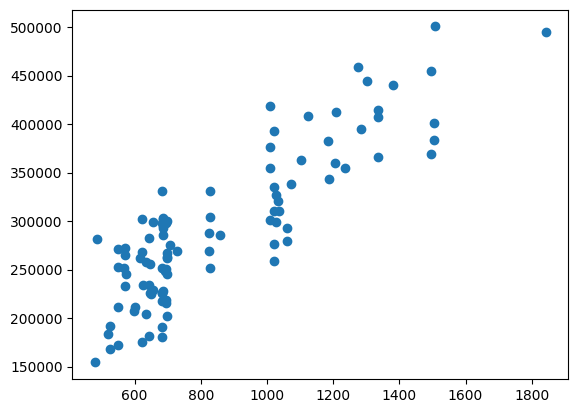

In [6]:
#to check whether the data is linearly separable or not
plt.scatter(x,y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
#simple linear regression (if x and y are of only 1 columns)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
#line equation y=mx+c
print(model.coef_) #m
print(model.intercept_) #c

[218.98817817]
108544.7701369999


In [16]:
y_pred=model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.6907868549524642


In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

1625072496.2111764
35120.39482198923
40312.1879362951


In [23]:
#check by predicting yourself
model.predict([[650.09]])

array([250906.79488183])

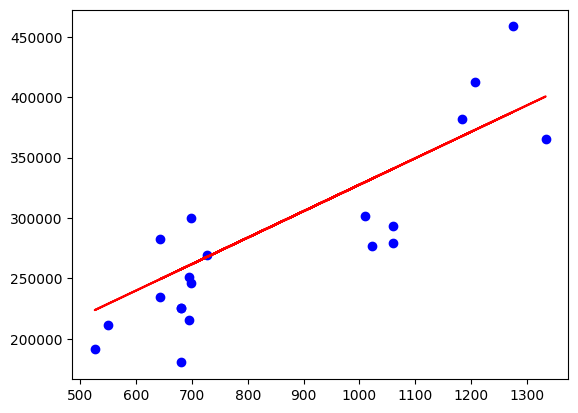

In [24]:
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,color='r')